# Learning from Data

* Unsupervised Learning

  * patterns in data
  
  * clusters
  
* Supervised learning

In unsupervised learning. Our goal is the discover patterns from Data. Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

## Clustering

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale

In [4]:
data=pd.read_csv('mtcars.csv',index_col=0)

In [5]:
list(data.columns.values)

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [6]:
# we select and standardise the first 7 variables (quantitative)
X_pre = data.iloc[:,0:7]
X = pd.DataFrame(scale(X_pre),index = data.index, columns = data.columns[0:7])

/Users/leannedong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


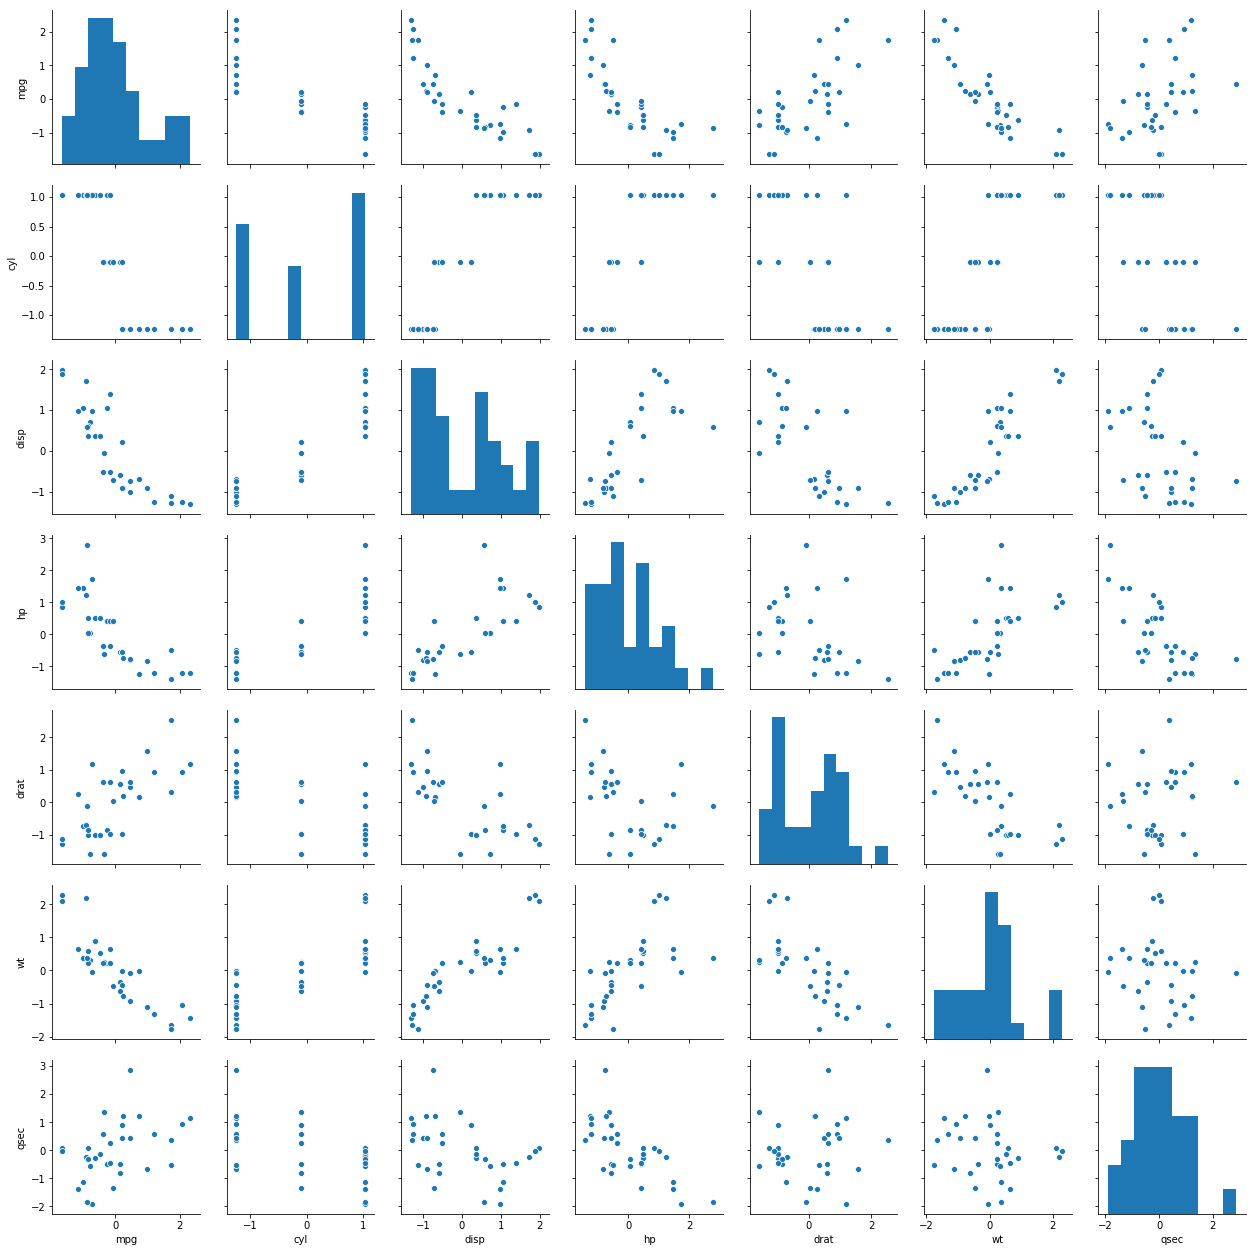

In [7]:
sns.pairplot(X)

### Hierarchical cluster analysis (complete linkage)

In [8]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

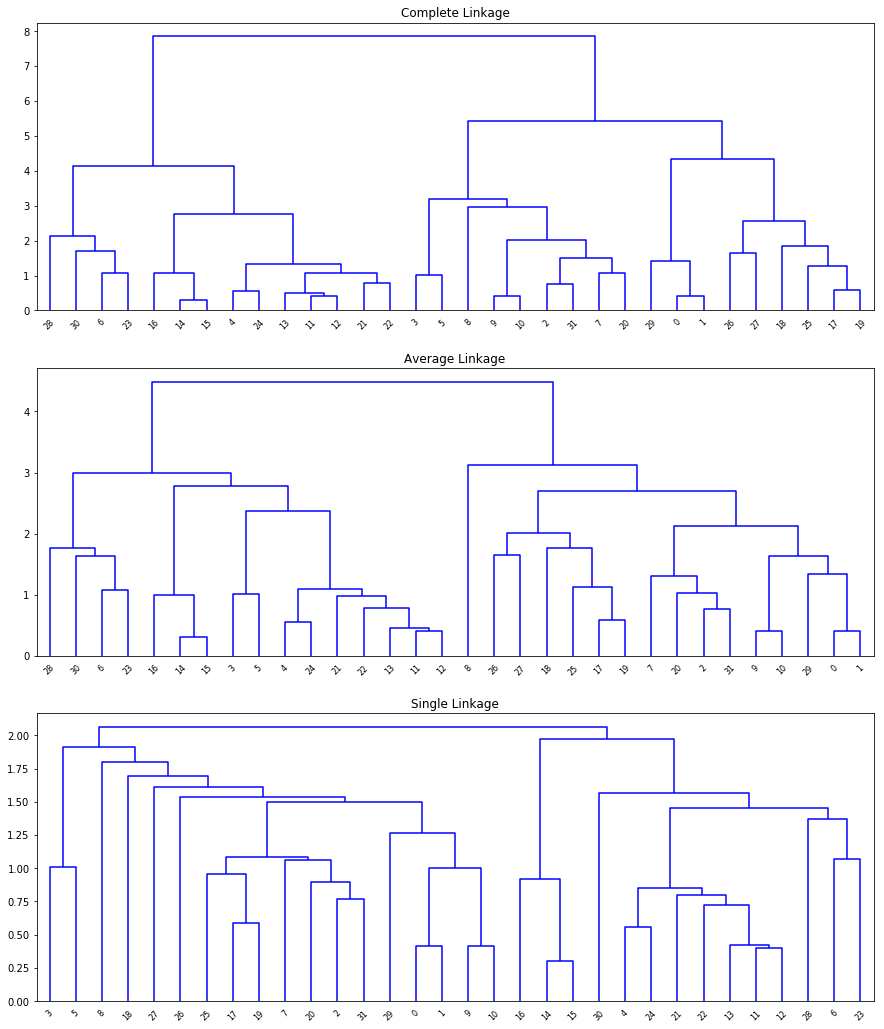

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

### K means Clustering

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans

In [10]:
from sklearn.cluster import KMeans

#### K=2

In [11]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
km1.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

#### K=3

In [13]:
km2 = KMeans(n_clusters=3, n_init=20)

In [14]:
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
pd.Series(km2.labels_).value_counts()

1    14
2    12
0     6
dtype: int64

In [16]:
km2.cluster_centers_

array([[ 1.68172488, -1.24445674, -1.18104497, -1.0548942 ,  1.24483443,
        -1.39582909,  0.3124762 ],
       [-0.84130144,  1.0311213 ,  1.00320808,  0.92655513, -0.69790243,
         0.81196838, -0.61212574],
       [ 0.14065591, -0.58074648, -0.57988694, -0.55353389,  0.19180228,
        -0.2493819 ,  0.5579086 ]])

In [17]:
km2.labels_

array([2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 2, 1, 2], dtype=int32)